In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import math
##Data analysis phase
##Main aim to understand the data
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [66]:
activity = pd.read_csv('FitBit data.csv') # importing the dataset

In [67]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [68]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [69]:
activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


In [70]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in activity.columns if activity[features].isnull().sum()>0]

In [71]:
features_with_na

[]

In [72]:
activity.loc[activity['Calories']==0.000000]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
134,2873212765,4/12/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
240,4319703577,4/9/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
290,4702921684,4/12/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
323,6117666160,4/10/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
412,8253242879,4/12/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0


In [73]:
activity['Activity_mon'] = pd.DatetimeIndex(activity['ActivityDate']).month
activity['Activity_day'] = pd.DatetimeIndex(activity['ActivityDate']).day

In [74]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [75]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_mon,Activity_day
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,3,25
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,3,26
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,3,27
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,3,28
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,3,29


In [76]:

activity['Activity_dayofweek'] = pd.DatetimeIndex(activity['ActivityDate']).dayofweek

In [77]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_mon,Activity_day,Activity_dayofweek
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,3,25,4
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,3,26,5
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,3,27,6
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,3,28,0
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,3,29,1


In [78]:

activity['Activity_year'] = pd.DatetimeIndex(activity['ActivityDate']).year

In [79]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_mon,Activity_day,Activity_dayofweek,Activity_year
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,3,25,4,2016
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,3,26,5,2016
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,3,27,6,2016
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,3,28,0,2016
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,3,29,1,2016


In [80]:

activity['Activity_week'] = pd.DatetimeIndex(activity['ActivityDate']).week

C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [81]:

activity=activity.drop(['TrackerDistance','ActivityDate'],axis=1)


In [82]:
activity.head()

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_mon,Activity_day,Activity_dayofweek,Activity_year,Activity_week
0,1503960366,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,3,25,4,2016,12
1,1503960366,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,3,26,5,2016,12
2,1503960366,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,3,27,6,2016,12
3,1503960366,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,3,28,0,2016,13
4,1503960366,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,3,29,1,2016,13


In [83]:
# list of numerical variables
numerical_features = [feature for feature in activity.columns if activity[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
activity[numerical_features].head()

Number of numerical variables:  18


,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_mon,Activity_day,Activity_dayofweek,Activity_year,Activity_week
0,1503960366,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,3,25,4,2016,12
1,1503960366,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,3,26,5,2016,12
2,1503960366,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,3,27,6,2016,12
3,1503960366,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,3,28,0,2016,13
4,1503960366,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,3,29,1,2016,13


In [84]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(activity[feature].unique())<50]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 8


In [85]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 10


In [86]:
discrete_feature,continuous_feature

(['Id',
  'LoggedActivitiesDistance',
  'SedentaryActiveDistance',
  'Activity_mon',
  'Activity_day',
  'Activity_dayofweek',
  'Activity_year',
  'Activity_week'],
 ['TotalSteps',
  'TotalDistance',
  'VeryActiveDistance',
  'ModeratelyActiveDistance',
  'LightActiveDistance',
  'VeryActiveMinutes',
  'FairlyActiveMinutes',
  'LightlyActiveMinutes',
  'SedentaryMinutes',
  'Calories'])

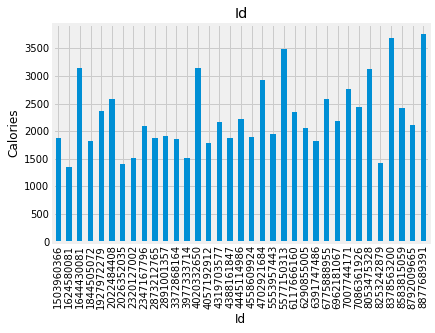

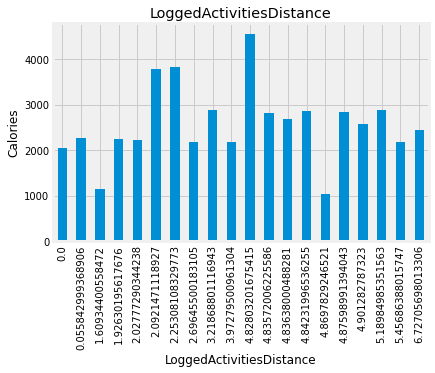

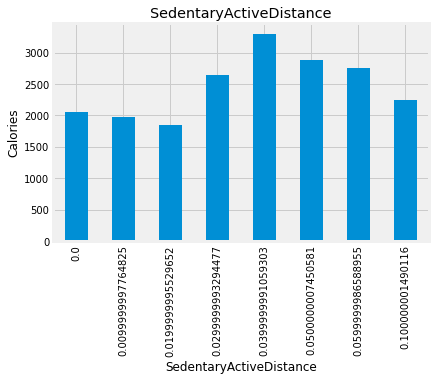

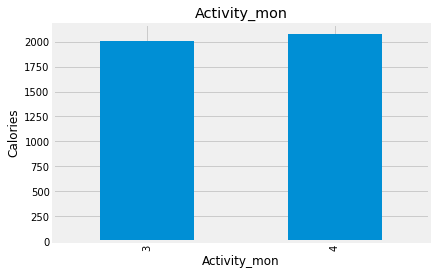

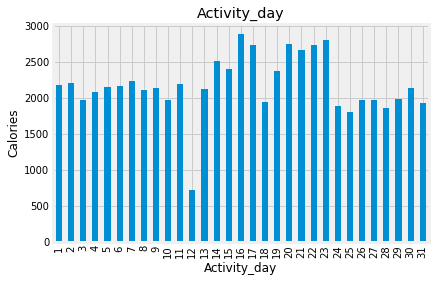

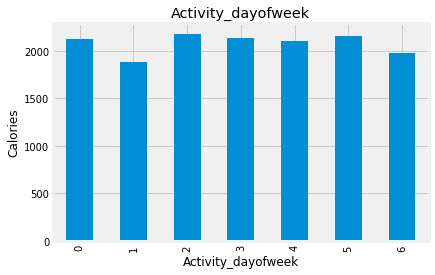

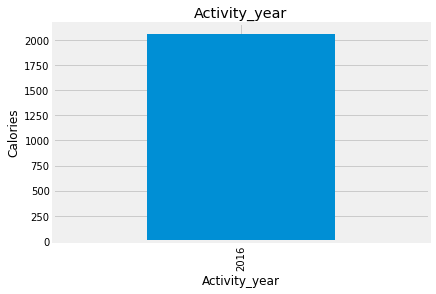

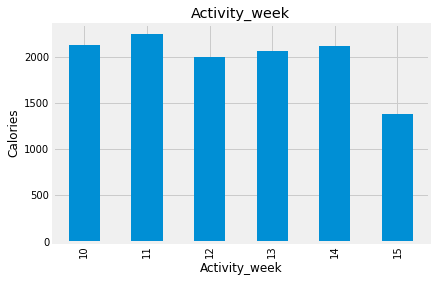

In [87]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=activity.copy()
    data.groupby(feature)['Calories'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Calories')
    plt.title(feature)
    plt.show()

In [88]:
def plot_distribution(dataset, cols=5, width=20, height=30, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight') #Use matplotlib style settings from a style specification.
    fig = plt.figure(figsize=(width,height)) #Create a new figure
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) # customizing the subplots
    rows = math.ceil(float(dataset.shape[1]) / cols)
    #print(rows)
    #iterating over the columns and then showing the data distribution in various columns
    for i, column in enumerate(dataset.columns):
        # print('befor',i,cols)
        ax = fig.add_subplot(rows, cols, i + 1)
        # print('after',i,cols)
        # print(column)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object: # plot counts of different values if the column has a datatype object
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            #print(substrings)
            g.set(yticklabels=substrings) #Set the y-tick labels with list of strings labels.
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()
        else:
            g = sns.distplot(dataset[column]) # Plotting if the datatype of the column is not object
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()


C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more det

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Khowsalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

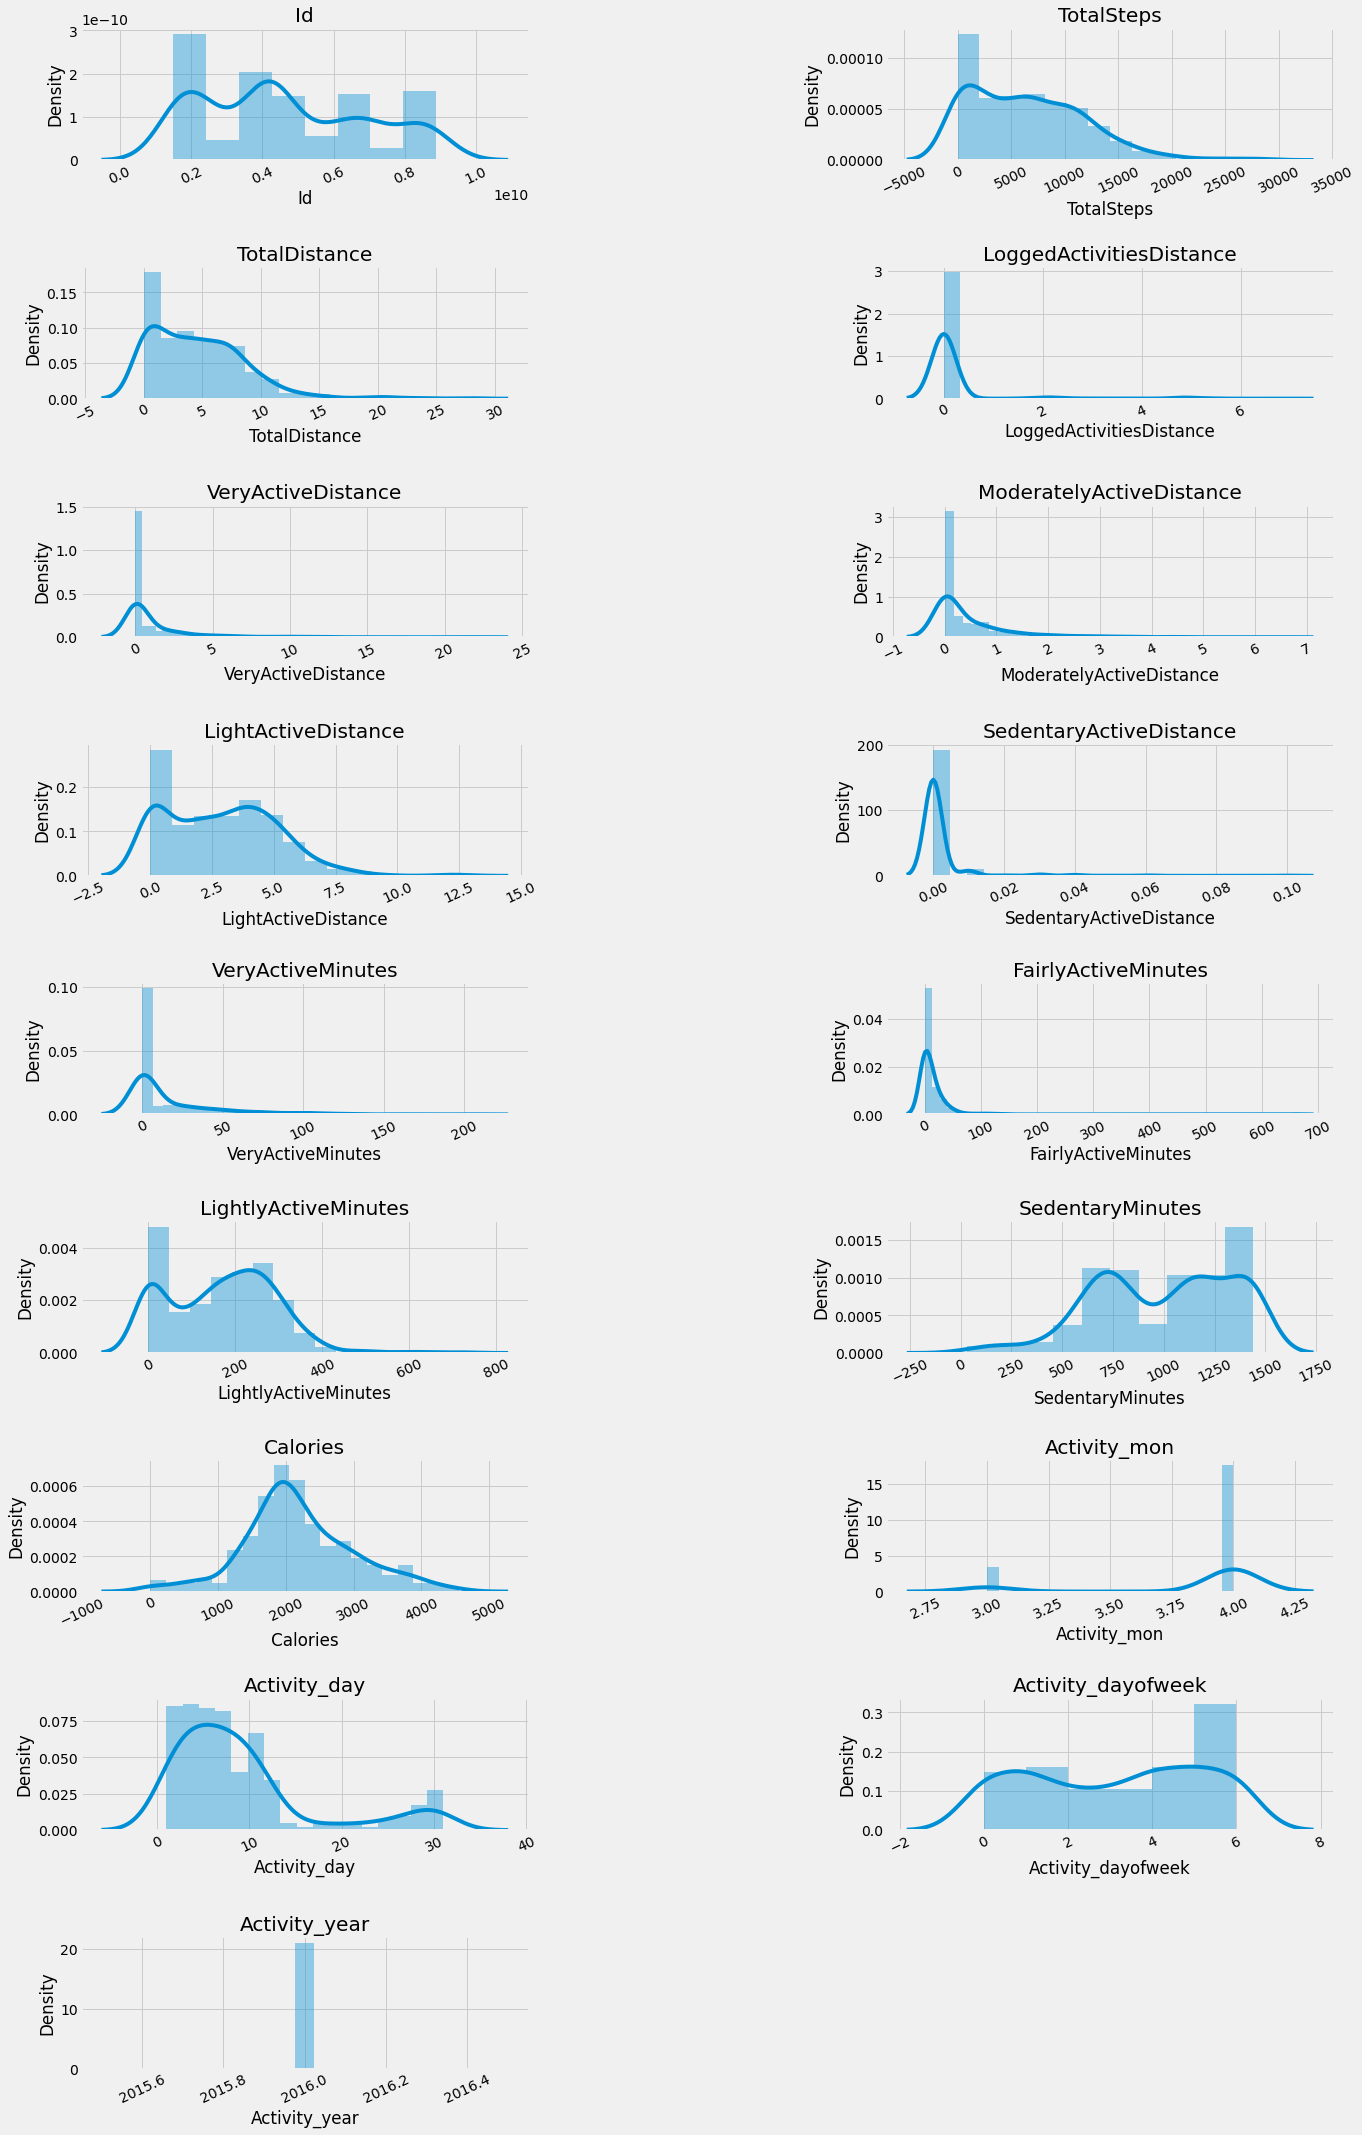

In [63]:
plot_distribution(activity, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)

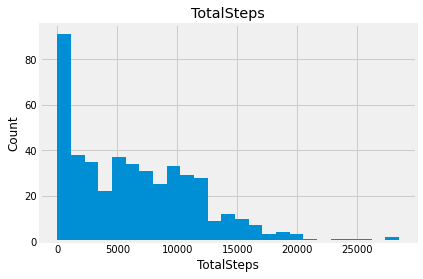

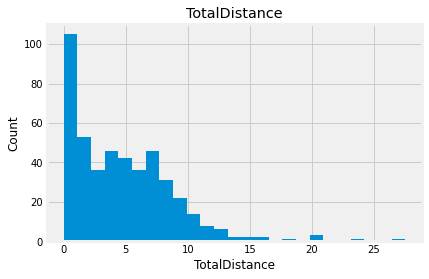

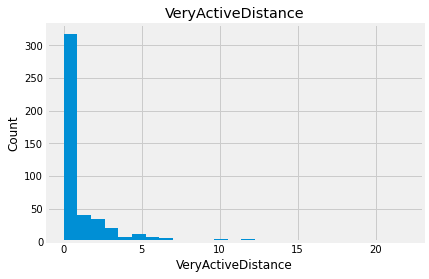

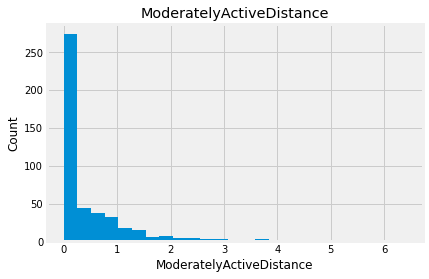

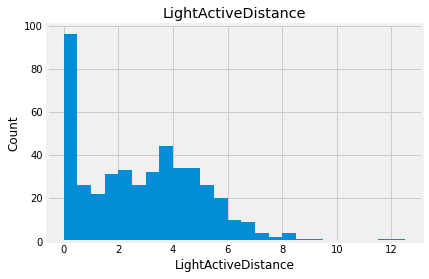

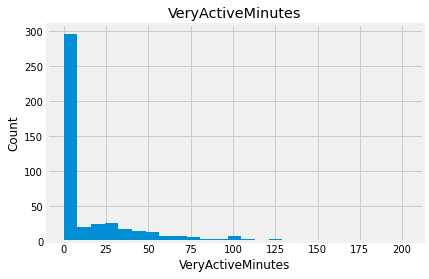

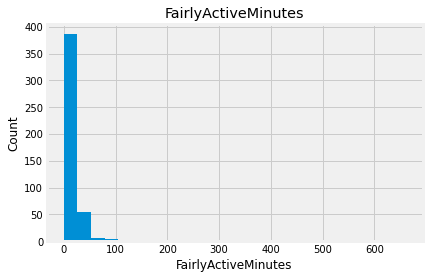

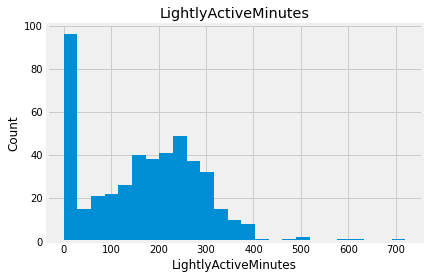

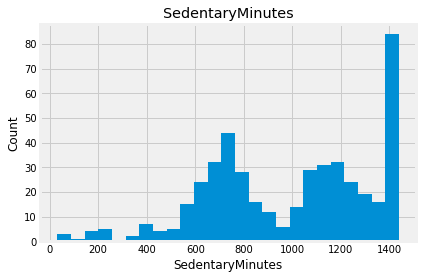

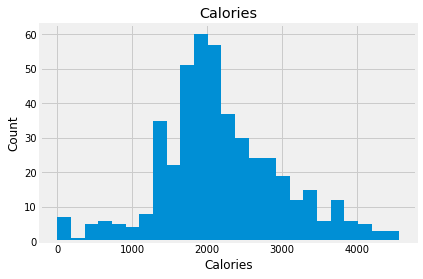

In [89]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=activity.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


In [96]:
feature_scale=[feature for feature in activity.columns if feature not in ['Id','Calories']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(activity[feature_scale])

MinMaxScaler()

In [97]:
scaler.transform(activity[feature_scale])

array([[0.38614591, 0.25826371, 0.        , ..., 0.66666667, 0.        ,
        0.4       ],
       [0.61792469, 0.41954231, 0.        , ..., 0.83333333, 0.        ,
        0.4       ],
       [0.44692424, 0.30984379, 0.        , ..., 1.        , 0.        ,
        0.4       ],
       ...,
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.8       ],
       [0.37274099, 0.29277153, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08246482, 0.06465674, 0.        , ..., 0.16666667, 0.        ,
        1.        ]])

In [98]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([activity[['Id', 'Calories']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(activity[feature_scale]), columns=feature_scale)],
                    axis=1)

In [99]:
data

,Id,Calories,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Activity_mon,Activity_day,Activity_dayofweek,Activity_year,Activity_week
0,1503960366,1819,0.386146,0.258264,0.0,0.117245,0.071875,0.325340,0.0,0.163366,0.018182,0.284722,0.548295,0.0,0.800000,0.666667,0.0,0.4
1,1503960366,2154,0.617925,0.419542,0.0,0.315693,0.114063,0.312550,0.0,0.440594,0.025758,0.380556,0.394886,0.0,0.833333,0.833333,0.0,0.4
2,1503960366,1944,0.446924,0.309844,0.0,0.212591,0.025000,0.296563,0.0,0.277228,0.007576,0.372222,0.406960,0.0,0.866667,1.000000,0.0,0.4
3,1503960366,1932,0.464294,0.324373,0.0,0.145529,0.123438,0.395683,0.0,0.193069,0.030303,0.311111,0.744318,0.0,0.900000,0.000000,0.0,0.6
4,1503960366,1886,0.422536,0.285143,0.0,0.098540,0.170313,0.368505,0.0,0.138614,0.042424,0.337500,0.519176,0.0,0.933333,0.166667,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,8877689391,4196,0.807594,0.740647,0.0,0.506387,0.098437,0.689049,0.0,0.346535,0.043939,0.498611,0.674716,1.0,0.233333,0.666667,0.0,0.8
453,8877689391,3841,0.577956,0.293135,0.0,0.000000,0.003125,0.641087,0.0,0.445545,0.013636,0.401389,0.724432,1.0,0.266667,0.833333,0.0,0.8
454,8877689391,4526,1.000000,1.000000,0.0,1.000000,0.175000,0.356515,0.0,0.633663,0.069697,0.293056,0.726562,1.0,0.300000,1.000000,0.0,0.8
455,8877689391,2820,0.372741,0.292772,0.0,0.067062,0.023438,0.509193,0.1,0.089109,0.010606,0.312500,0.822443,1.0,0.333333,0.000000,0.0,1.0


In [102]:
data.drop(['Activity_year'],axis=1)

,Id,Calories,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Activity_mon,Activity_day,Activity_dayofweek,Activity_week
0,1503960366,1819,0.386146,0.258264,0.0,0.117245,0.071875,0.325340,0.0,0.163366,0.018182,0.284722,0.548295,0.0,0.800000,0.666667,0.4
1,1503960366,2154,0.617925,0.419542,0.0,0.315693,0.114063,0.312550,0.0,0.440594,0.025758,0.380556,0.394886,0.0,0.833333,0.833333,0.4
2,1503960366,1944,0.446924,0.309844,0.0,0.212591,0.025000,0.296563,0.0,0.277228,0.007576,0.372222,0.406960,0.0,0.866667,1.000000,0.4
3,1503960366,1932,0.464294,0.324373,0.0,0.145529,0.123438,0.395683,0.0,0.193069,0.030303,0.311111,0.744318,0.0,0.900000,0.000000,0.6
4,1503960366,1886,0.422536,0.285143,0.0,0.098540,0.170313,0.368505,0.0,0.138614,0.042424,0.337500,0.519176,0.0,0.933333,0.166667,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,8877689391,4196,0.807594,0.740647,0.0,0.506387,0.098437,0.689049,0.0,0.346535,0.043939,0.498611,0.674716,1.0,0.233333,0.666667,0.8
453,8877689391,3841,0.577956,0.293135,0.0,0.000000,0.003125,0.641087,0.0,0.445545,0.013636,0.401389,0.724432,1.0,0.266667,0.833333,0.8
454,8877689391,4526,1.000000,1.000000,0.0,1.000000,0.175000,0.356515,0.0,0.633663,0.069697,0.293056,0.726562,1.0,0.300000,1.000000,0.8
455,8877689391,2820,0.372741,0.292772,0.0,0.067062,0.023438,0.509193,0.1,0.089109,0.010606,0.312500,0.822443,1.0,0.333333,0.000000,1.0


# Data Vizualization

In [104]:
activity.head()

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_mon,Activity_day,Activity_dayofweek,Activity_year,Activity_week
0,1503960366,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,3,25,4,2016,12
1,1503960366,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,3,26,5,2016,12
2,1503960366,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,3,27,6,2016,12
3,1503960366,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,3,28,0,2016,13
4,1503960366,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,3,29,1,2016,13


In [109]:
activity.describe()

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_mon,Activity_day,Activity_dayofweek,Activity_year,Activity_week
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.0,457.000000
mean,4.628595e+09,6546.562363,4.663523,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954,3.838074,9.214442,3.089716,2016.0,13.586433
std,2.293781e+09,5398.493064,4.082072,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523,0.368786,7.966072,2.078145,0.0,0.913874
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,3.000000,1.000000,0.000000,2016.0,10.000000
25%,2.347168e+09,1988.000000,1.410000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000,4.000000,4.000000,1.000000,2016.0,13.000000
50%,4.057193e+09,5986.000000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000,4.000000,7.000000,3.000000,2016.0,14.000000
75%,6.391747e+09,10198.000000,7.160000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000,4.000000,11.000000,5.000000,2016.0,14.000000
max,8.877689e+09,28497.000000,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000,4.000000,31.000000,6.000000,2016.0,15.000000


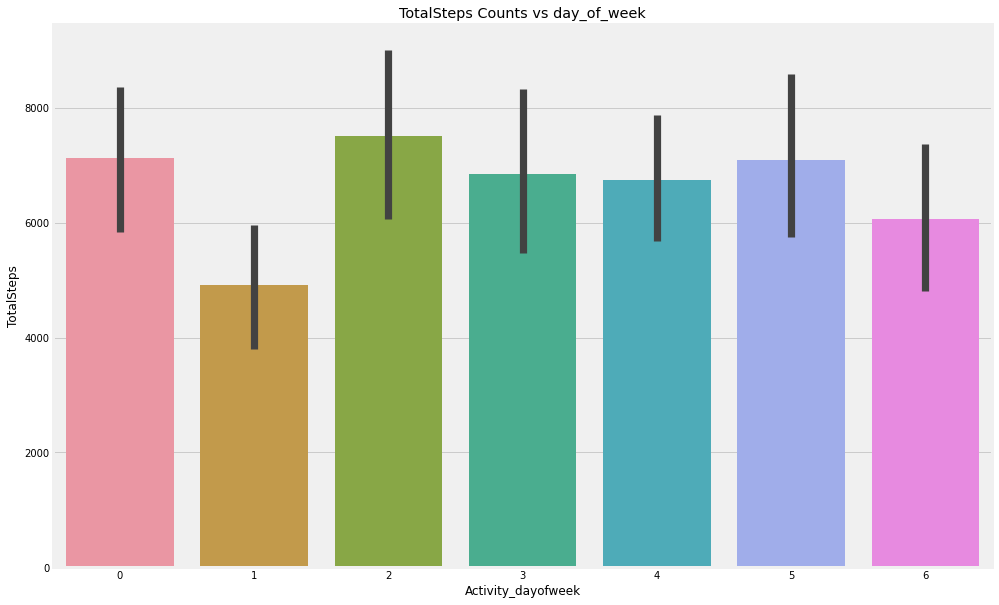

In [115]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=activity.Activity_dayofweek, y=activity.TotalSteps)
plt.xticks(rotation=360)
plt.xlabel("Activity_dayofweek")
plt.ylabel("TotalSteps")
plt.title("TotalSteps Counts vs day_of_week")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=activity.Activity_dayofweek, y=activity.TotalSteps)
plt.xticks(rotation=360)
plt.xlabel("Activity_dayofweek")
plt.ylabel("TotalSteps")
plt.title("TotalSteps Counts vs day_of_week")
plt.show()

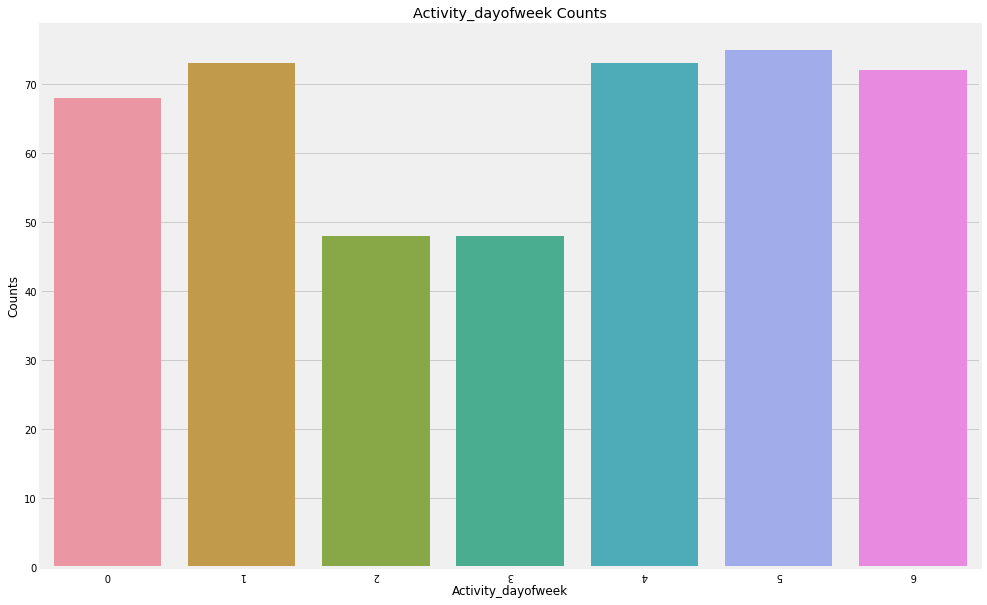

In [116]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=activity.Activity_dayofweek.value_counts().index, y=activity.Activity_dayofweek.value_counts())
plt.xticks(rotation=180)
plt.xlabel("Activity_dayofweek")
plt.ylabel("Counts")
plt.title("Activity_dayofweek Counts")
plt.show()

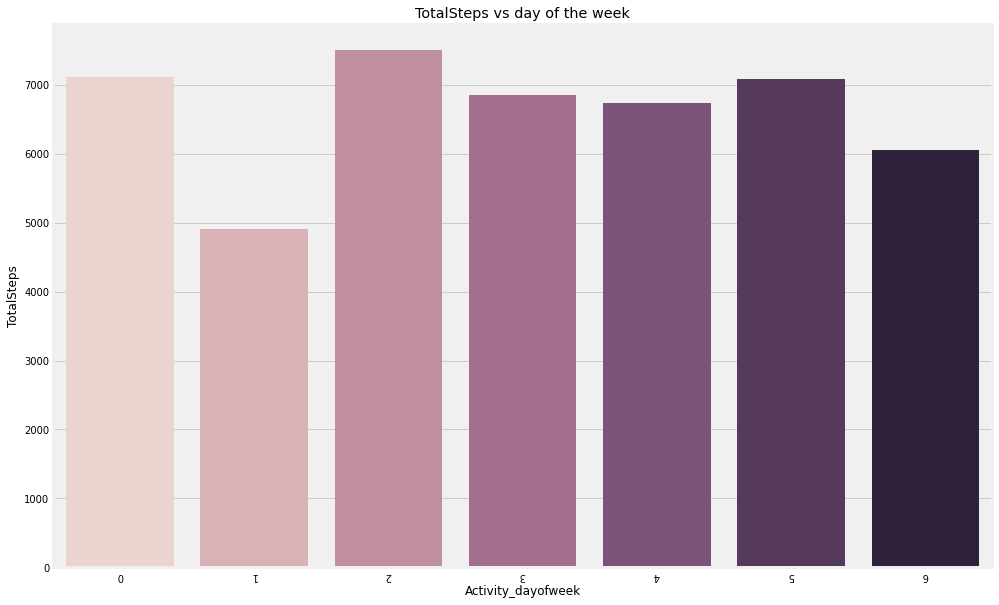

In [119]:

day_steps=pd.DataFrame(activity.groupby("Activity_dayofweek")["TotalSteps"].mean())
day_steps.reset_index(level=0, inplace=True)
day_steps.head()
plt.figure(figsize=(15,10))
ax=sns.barplot(x=day_steps.Activity_dayofweek,y=day_steps.TotalSteps,palette = sns.cubehelix_palette(len(day_steps.index)))
plt.xticks(rotation=180)
plt.xlabel("Activity_dayofweek")
plt.ylabel("TotalSteps")
plt.title("TotalSteps vs day of the week")
plt.show()

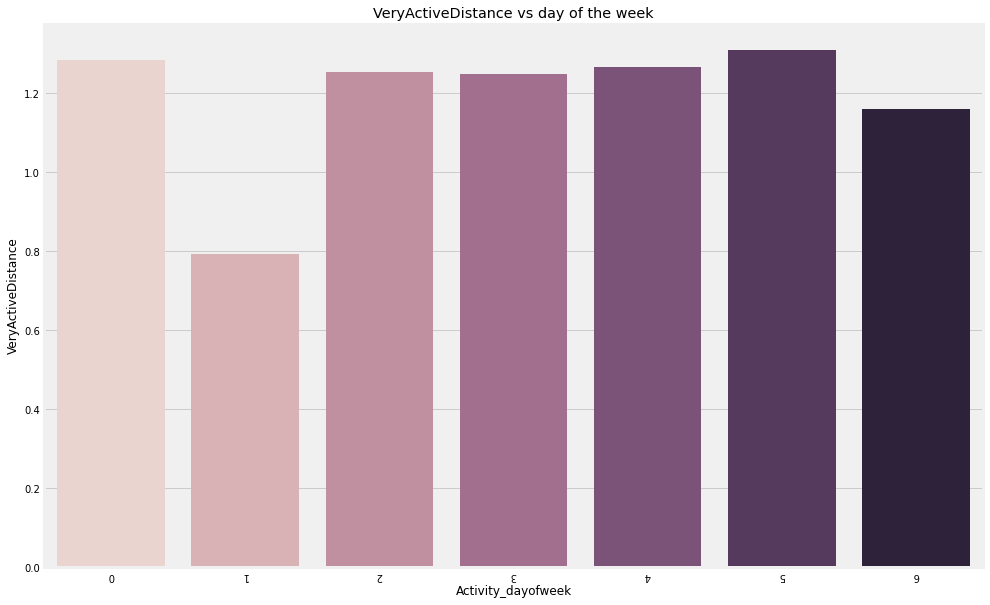

In [121]:

day_activemin=pd.DataFrame(activity.groupby("Activity_dayofweek")["VeryActiveDistance"].mean())
day_activemin.reset_index(level=0, inplace=True)
day_activemin.head()
plt.figure(figsize=(15,10))
ax=sns.barplot(x=day_activemin.Activity_dayofweek,y=day_activemin.VeryActiveDistance,palette = sns.cubehelix_palette(len(day_activemin.index)))
plt.xticks(rotation=180)
plt.xlabel("Activity_dayofweek")
plt.ylabel("VeryActiveDistance")
plt.title("VeryActiveDistance vs day of the week")
plt.show()

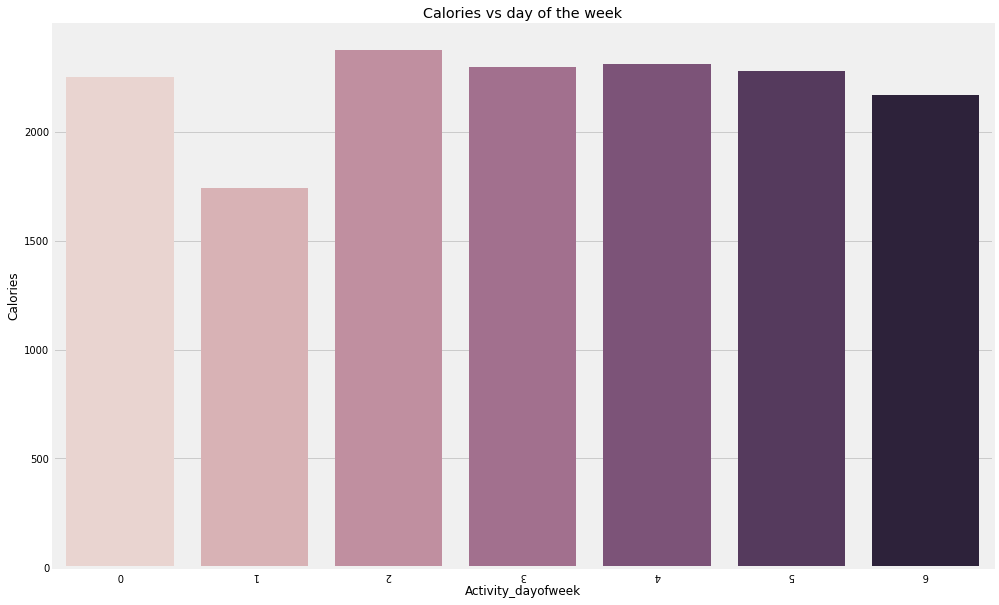

In [122]:

day_calories=pd.DataFrame(activity.groupby("Activity_dayofweek")["Calories"].mean())
day_calories.reset_index(level=0, inplace=True)
day_calories.head()
plt.figure(figsize=(15,10))
ax=sns.barplot(x=day_calories.Activity_dayofweek,y=day_calories.Calories,palette = sns.cubehelix_palette(len(day_calories.index)))
plt.xticks(rotation=180)
plt.xlabel("Activity_dayofweek")
plt.ylabel("Calories")
plt.title("Calories vs day of the week")
plt.show()

In [123]:
dayGroupedData = activity.groupby(['Activity_dayofweek']).mean()


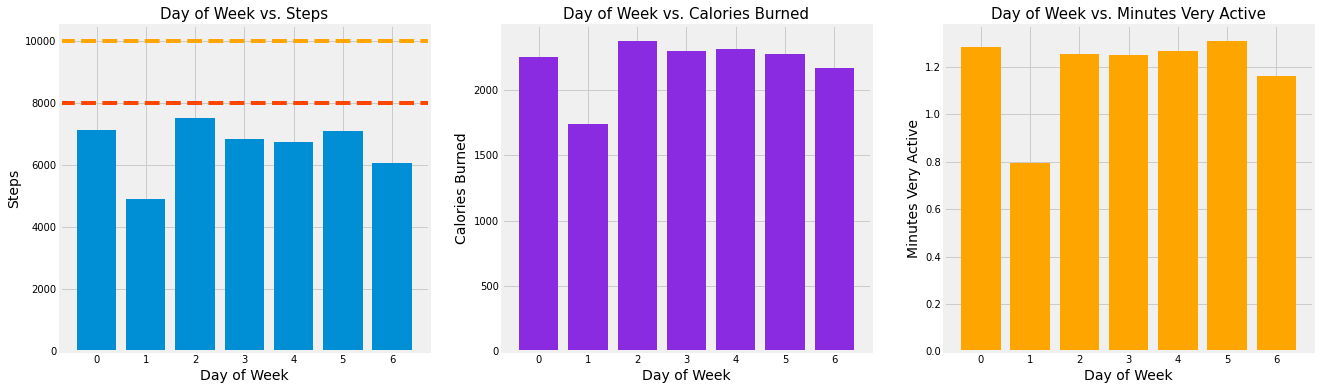

In [128]:

fig = plt.figure(figsize = (20,6))

ax = plt.subplot(131)  
plt.bar(dayGroupedData.index, dayGroupedData['TotalSteps'])
plt.title('Day of Week vs. Steps', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Steps', fontsize=14)
ax.axhline(8000, color="orangered", linestyle='--')
ax.axhline(10000, color="orange", linestyle='--')

##################
ax2 = fig.add_subplot(132)
plt.bar(dayGroupedData.index, dayGroupedData['Calories'], color='blueviolet')
plt.title('Day of Week vs. Calories Burned', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)


#############

ax3 = fig.add_subplot(133)

plt.bar(dayGroupedData.index, dayGroupedData['VeryActiveDistance'], color='orange')
plt.title('Day of Week vs. Minutes Very Active', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Minutes Very Active', fontsize=14)
plt.show()



Text(0.5, 1.0, '"Sedentary minutes" per day')

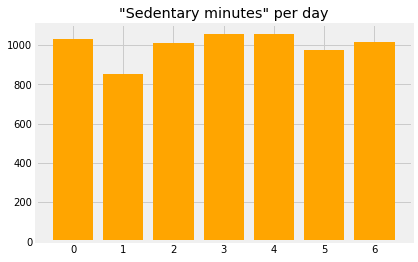

In [130]:

plt.bar(dayGroupedData.index, dayGroupedData['SedentaryMinutes'], color='orange')
plt.title('"Sedentary minutes" per day')

In [131]:
activity.SedentaryMinutes.unique()

array([ 804,  588,  605, 1080,  763, 1174,  820,  866,  636,  655,  757,
        736, 1173, 1208, 1160,  738,  737,  855,   32, 1319, 1393, 1328,
       1345, 1374, 1356, 1285, 1219, 1352, 1283, 1170, 1366, 1385, 1386,
       1297, 1318, 1240, 1268,  604,  838,  918, 1082, 1181, 1244, 1149,
       1229,  207, 1171, 1177, 1114,  669, 1440, 1439, 1150,  620,  810,
       1189,  426,  854,  858, 1183,  829,  912,  938, 1397, 1406, 1250,
        805,  842,  161, 1139, 1203, 1126, 1069, 1093, 1054, 1092, 1078,
       1077, 1111,  551,  729,  795,  720,  644,  621,  673,  719,  700,
        654,  694,  223, 1265, 1120, 1347, 1287, 1220, 1337, 1038,  617,
        615,  613,  583,  491,  638,  696,  759, 1002,  711,  970,  463,
        788,  425, 1399, 1243, 1107, 1055, 1066, 1058, 1060, 1098, 1180,
        882,  780,   99, 1129, 1074, 1141, 1192, 1094, 1085, 1158, 1063,
        735,  748,  710,  614,  815,  685,  697,  894,  187,  771, 1005,
        874,  599,  986, 1289, 1253,  860,  752,  7

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

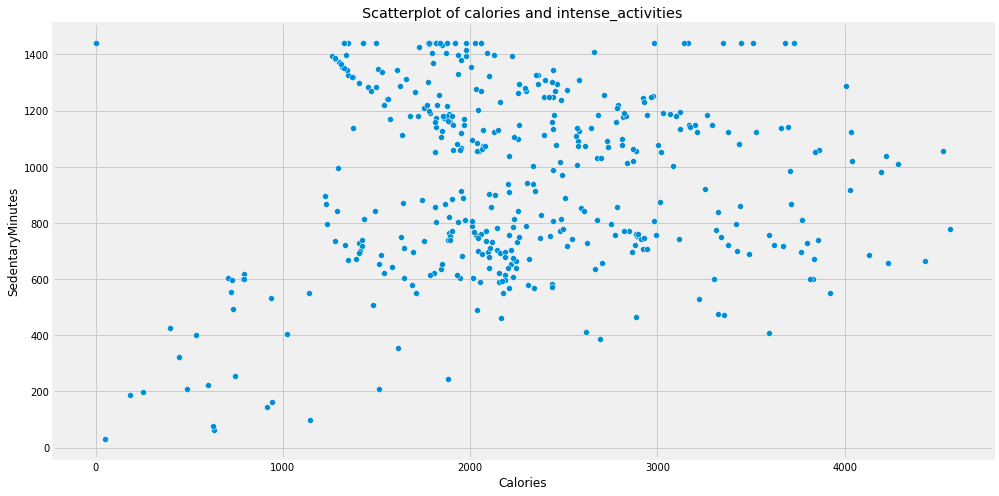

In [132]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='SedentaryMinutes', data=activity)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

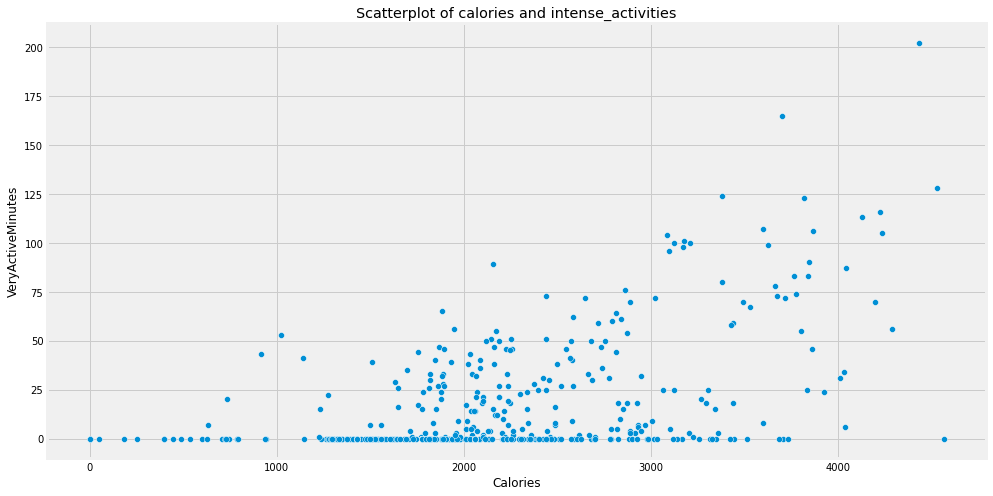

In [133]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between calories burnt in the intensely active minutes
ax = sns.scatterplot(x='Calories', y='VeryActiveMinutes', data=activity)

ax.set_title('Scatterplot of calories and intense_activities')

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

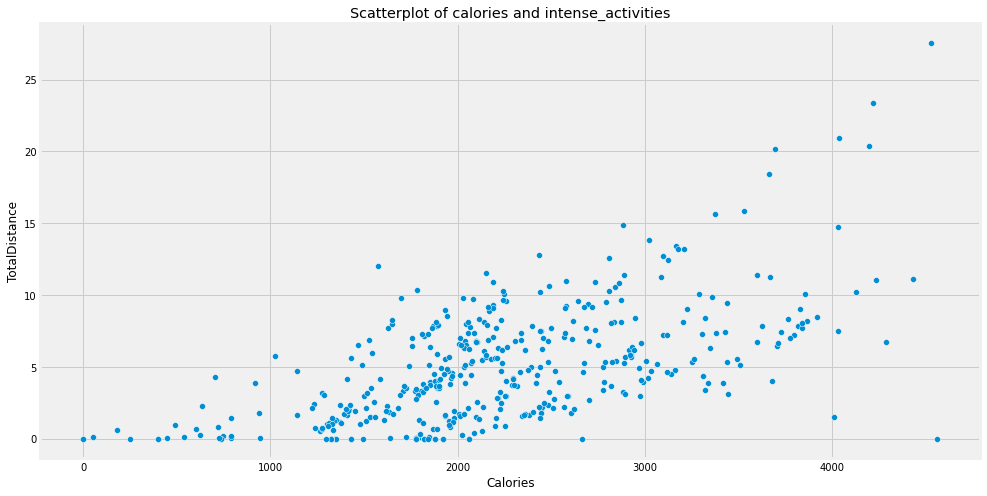

In [134]:
# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot between  calories burnt and total distance covered
ax = sns.scatterplot(x='Calories', y='TotalDistance', data=activity)

ax.set_title('Scatterplot of calories and intense_activities')